# Problem 2: Getting familiar with TensorFlow

*TensorFlow* is one of the most popular deep learning framework developed by Google. If you are new to TensorFlow, please read and play with the sample in [Getting started with TensorFlow](https://www.tensorflow.org/get_started/get_started) to get started.

* <b>Learning Objective:</b> In Problem 1, you implemented a fully connected network from scratch on your own. Very tedious to do it all by yourself, right? Well, we actually feel the same thing, that's why we are using tools instead of doing everything from scratch, lonely and depressed. For this part of the assignment, we will familiarize you with a widely-used deep learning framework developed by Google, TensorFlow and walk you through convolutional neural networks and show how to train them.
* <b>Provided Codes:</b> We provide the Template class for a simple CNN model as BaseModel, predefined skeletons for conv2d() and max_pool(), as well as the dataset preprocessing parts.
* <b>TODOs:</b> You are asked to implement the BaseModel following the detailed instrunctions and design your own model in YourModel to achieve a reasonably good performance for classification task on CIFAR-10 dataset.

## Install and import libraries
Install tensorflow and matplotlib.

```
pip install -U tensorflow matplotlib
```

In [1]:
# Import required libraries
# Add whatever you want
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

print "TensorFlow Version {}".format(tf.__version__)

TensorFlow Version 1.3.1


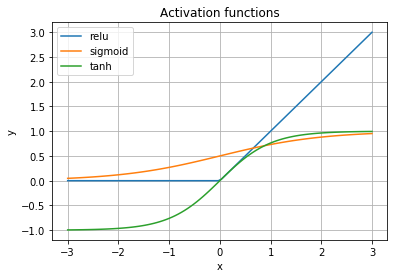

In [2]:
# Test matplotlib
x = np.linspace(-3, 3, 100)

plt.plot(x, np.maximum(0, x), label='relu')
plt.plot(x, 1/(1 + np.exp(-x)), label='sigmoid')
plt.plot(x, (1 - np.exp(-2 * x))/(1 + np.exp(-2 * x)), label='tanh')

plt.xlabel('x')
plt.ylabel('y')

plt.title("Activation functions")
plt.legend()
plt.grid(True)

plt.show()

In [3]:
# Test tensorflow
print('TensorFlow version: ' + tf.__version__)
a = tf.constant(2.0)
b = tf.constant(3.0)
c = a * b

sess = tf.Session()
result = sess.run([a, b, c])
print('%f * %f = %f' % (result[0], result[1], result[2]))
sess.close()

TensorFlow version: 1.3.1
2.000000 * 3.000000 = 6.000000


## Load datasets
Download [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz) and load the dataset. In this assignment, we will use all 50,000 images for training and 10,000 images for test.

In [4]:
# Configuration
num_training = 49000
num_validation = 50000 - num_training
num_test = 10000


def unpickle(file):
    import sys
    if sys.version_info.major == 2:
        import cPickle
        with open(file, 'rb') as fo:
            dict = cPickle.load(fo)
        return dict['data'], dict['labels']
    else:
        import pickle
        with open(file, 'rb') as fo:
            dict = pickle.load(fo, encoding='bytes')
        return dict[b'data'], dict[b'labels']

def load_train_data():
    pass

    #############################################################################
    # TODO: Load training data from cifar-10 dataset                            #
    # Load five files from 'data_batch_1' to 'data_batch_5'                     #
    # Reshape images and labels to the shape of [50000, 32, 32, 3]              # 
    # and [50000], respectively                                                 #
    #############################################################################
    import os
    from scipy.misc import imread

    all_batches = []
    all_labels = []
    data_path = "data/cifar-10-batches-py"
    for b in range(1,6):
        f_train_curr = os.path.join(data_path, 'data_batch_%d' % (b, ))
        batch, labels = unpickle(f_train_curr)
        batch = batch.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        labels = np.array(labels)
        all_batches.append(batch)
        all_labels.append(labels)
    data_train = np.concatenate(all_batches)
    labels_train = np.concatenate(all_labels)
    del batch, labels
    
    # Subsample the data
    data_val = data_train[range(num_training, num_training+num_validation)]
    labels_val = labels_train[range(num_training, num_training+num_validation)]
    data_train = data_train[range(num_training)]
    labels_train = labels_train[range(num_training)]
    
    # Normalize the data: subtract the images mean
    mean_image = np.mean(data_train, axis=0)
    data_train -= mean_image
    data_val -= mean_image
    
    return data_train, labels_train, data_val, labels_val
    
    
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################

def load_test_data():
    pass

    #############################################################################
    # TODO: Load testing data from cifar-10 dataset                             #
    # Load 'test_batch' file                                                    #
    # Reshape images and labels to the shape of [10000, 32, 32, 3]              #
    # and [10000], respectively                                                 #
    #############################################################################
    import os
    from scipy.misc import imread

    all_batches = []
    all_labels = []
    data_path = "data/cifar-10-batches-py"
    
    for b in range(1,6):
        f_train_curr = os.path.join(data_path, 'data_batch_%d' % (b, ))
        batch, labels = unpickle(f_train_curr)
        batch = batch.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        labels = np.array(labels)
        all_batches.append(batch)
        all_labels.append(labels)
    data_train = np.concatenate(all_batches)
    labels_train = np.concatenate(all_labels)
    del batch, labels
    
    f_test = os.path.join(data_path, 'test_batch')
    batch, labels = unpickle(f_test)
    data_test = batch.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
    labels_test = np.array(labels)
    del batch, labels

    data_train = data_train[range(num_training)]
    labels_train = labels_train[range(num_training)]
    data_test = data_test[range(num_test)]
    labels_test = labels_test[range(num_test)]
    
    mean_image = np.mean(data_train, axis=0)
    data_test -= mean_image
    
    return data_test, labels_test
    
    
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################

# Load cifar-10 data
X_train, Y_train, X_val, Y_val = load_train_data()
X_test, Y_test = load_test_data()

# Check the shape of the dataset
assert X_train.shape == (num_training, 32, 32, 3)
assert Y_train.shape == (num_training, )
assert X_val.shape == (num_validation, 32, 32, 3)
assert Y_val.shape == (num_validation, )
assert X_test.shape == (num_test, 32, 32, 3)
assert Y_test.shape == (10000, )

## Question 2-1

Using the code provided, implement a neural network architecture with an optimization routine according to the specification provided below.

**Model:**
- Input image with the size 32x32x3
- 7x7 convolutional layer with 32 filters, stride of 1, and padding 'SAME'
- ReLU activation layer
- 3x3 max pooling layer with a stride of 2
- 5x5 convolutional layer with 64 filters, stride of 1, and padding 'SAME'
- ReLU activation layer
- 3x3 max pooling layer with a stride of 2
- Flatten layer (8x8x64 -> 4096)
- Fully-connected layer with 384 output units (4096 -> 384)
- ReLU activation layer
- Fully-connected layer with 10 output units (384 -> 10)
- Output logits (10)

**Optimizer:**
- Adam optimizer

**Learning rate:**
- Set start learning rate as 5e-4 and apply exponential decay every 500 steps with a base of 0.96
- Use 'tf.train.exponential_decay' and 'tf.train.AdamOptimizer'

**Loss:**
- Softmax cross entropy loss
- Use 'tf.nn.softmax_cross_entropy_with_logits'


Your model **should** achieve about 60% accuracy on validation set in 5 epochs using provided evaluation code.

You can modify the template code as you want.

## Define your layers

In [5]:
# Define max pooling and conv layers

def conv2d(input, kernel_size, stride, num_filter):
    stride_shape = [1, stride, stride, 1]
    filter_shape = [kernel_size, kernel_size, input.get_shape()[3], num_filter]
    
    W = tf.get_variable('w', filter_shape, tf.float32, tf.random_normal_initializer(0.0, 0.02))
    b = tf.get_variable('b', [1, 1, 1, num_filter], initializer=tf.constant_initializer(0.0))
    return tf.nn.conv2d(input, W, stride_shape, padding='SAME') + b

def max_pool(input, kernel_size, stride):
    ksize = [1, kernel_size, kernel_size, 1]
    strides = [1, stride, stride, 1]
    return tf.nn.max_pool(input, ksize=ksize, strides=strides, padding='SAME')

#############################################################################
# TODO: You can add any layers (fully-connected, normalization)             #
#############################################################################
layers = tf.contrib.layers

def conv2d_contrib(input, kernel_size, stride, num_filter):
    return layers.conv2d(input, num_filter, kernel_size = [kernel_size, kernel_size], stride = stride, 
                         activation_fn=None,  
                         weights_initializer=layers.variance_scaling_initializer(),
                         weights_regularizer=layers.l2_regularizer(0.0005),
                         biases_initializer=tf.zeros_initializer())


def batch_norm(input, is_training = True):
    return layers.batch_norm(input, scale=True, epsilon=1e-5,
                            updates_collections=tf.GraphKeys.UPDATE_OPS,
                            is_training=is_training)
    
def fc(input, output_depth):
    
    W = tf.get_variable('w', [input.get_shape()[1], output_depth], 
                        tf.float32, tf.truncated_normal_initializer(stddev=0.01))
    b = tf.get_variable('b', [output_depth], initializer=tf.constant_initializer(0.0))
    
    return tf.matmul(input, W)+b


def flat(input):
#     dim = tf.reduce_prod(tf.shape(input)[1:])
#     return tf.reshape(input, [-1, dim])
    return tf.contrib.layers.flatten(input)
    
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################

## Sample convolutional neural network

In [6]:
class BaseModel(object):
    def __init__(self):
        self.num_epoch = 5
        self.batch_size = 128
        self.log_step = 50
        self._build_model()

    def _model(self):
        print('-' * 5 + '  Sample model  ' + '-' * 5)

        print('input layer: ' + str(self.X.get_shape()))

        with tf.variable_scope('conv1'):
            self.conv1 = conv2d(self.X, 7, 1, 32)
            self.relu1 = tf.nn.relu(self.conv1)
            self.pool1 = max_pool(self.relu1, 3, 2)            
            print('conv1 layer: ' + str(self.pool1.get_shape()))

        with tf.variable_scope('conv2'):
            #############################################################################
            # TODO: Complete the following functions                                    #
            #############################################################################
            self.conv2 = conv2d(self.pool1, 5, 1, 64)
            self.relu2 = tf.nn.relu(self.conv2)
            self.pool2 = max_pool(self.relu2, 3, 2)               
            #############################################################################
            #                             END OF YOUR CODE                              #
            #############################################################################
            print('conv2 layer: ' + str(self.pool2.get_shape()))

        #############################################################################
        # TODO: Flatten the output tensor from conv2 layer                          #
        #############################################################################
        self.flat = flat(self.pool2)
        #############################################################################
        #                             END OF YOUR CODE                              #
        ################################# super(YourModel, self)._input_ops()############################################      
        print('flat layer: ' + str(self.flat.get_shape()))

        with tf.variable_scope('fc3'):
            #############################################################################
            # TODO: Complete the following functions                                     #
            #############################################################################
            self.fc3 = fc(self.flat, 384)
            self.relu3 = tf.nn.relu(self.fc3)
            #############################################################################
            #                             END OF YOUR CODE                              #
            #############################################################################
            print('fc3 layer: ' + str(self.relu3.get_shape()))

        with tf.variable_scope('fc4'):
            #############################################################################
            # TODO: Complete the following functions                                    #
            #############################################################################
            self.fc4 = fc(self.relu3, 10)           
            #############################################################################
            #                             END OF YOUR CODE                              #
            #############################################################################
            print('fc4 layer: ' + str(self.fc4.get_shape()))
        
        # Return the last layer
        return self.fc4

    def _input_ops(self):
        # Placeholders
        self.X = tf.placeholder(tf.float32, [None, 32, 32, 3])
        self.Y = tf.placeholder(tf.int64, [None])
        
        #############################################################################
        # TODO: You can add any placeholders                                        #
        #############################################################################       
        # These are for the use of bn and dropout
        # self.is_train = True
        # self.keep_prob = 1
        #############################################################################
        #                             END OF YOUR CODE                              #
        #############################################################################

    def _build_optimizer(self):
        # Adam optimizer 'self.train_op' that minimizes 'self.loss_op'
        #############################################################################
        # TODO: Complete the following functions                                    #
        #############################################################################
        global_step = tf.Variable(0, name='global_step', trainable=False)
        learning_rate = tf.train.exponential_decay(learning_rate=float(5e-4),
                                            global_step=global_step,
                                            decay_steps=500,
                                            decay_rate=0.96,
                                            staircase=False)
            
        optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
        self.train_op = optimiser.minimize(loss=self.loss_op, global_step=global_step)
        #############################################################################
        #                             END OF YOUR CODE                              #
        #############################################################################
        
    def _loss(self, labels, logits):
        # Softmax cross entropy loss 'self.loss_op'
        #############################################################################
        # TODO: Complete the following functions                                    #
        #############################################################################
        
        self.loss_op =  tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))       
        #############################################################################
        #                             END OF YOUR CODE                              #
        #############################################################################

    def _build_model(self):
        # Define input variables
        self._input_ops()

        # Convert Y to one-hot vector
        labels = tf.one_hot(self.Y, 10)

        # Build a model and get logits
        logits = self._model()

        # Compute loss
        self._loss(labels, logits)
        
        # Build optimizer
        self._build_optimizer()

        # Compute accuracy
        predict = tf.argmax(logits, 1)
        correct = tf.equal(predict, self.Y)
        self.accuracy_op = tf.reduce_mean(tf.cast(correct, tf.float32))
        
    def train(self, sess, X_train, Y_train, X_val, Y_val):
        sess.run(tf.global_variables_initializer())

        step = 0
        losses = []
        accuracies = []
        print('-' * 5 + '  Start training  ' + '-' * 5)
        for epoch in range(self.num_epoch):
            print('train for epoch %d' % epoch)
            for i in range(num_training // self.batch_size):
                X_ = X_train[i * self.batch_size:(i + 1) * self.batch_size][:]
                Y_ = Y_train[i * self.batch_size:(i + 1) * self.batch_size]

                #############################################################################
                # TODO: You can change feed data as you want                                #
                #############################################################################
                feed_dict = {self.X: X_,
                             self.Y: Y_}
                #############################################################################
                #                             END OF YOUR CODE                              #
                #############################################################################
                fetches = [self.train_op, self.loss_op, self.accuracy_op]

                _, loss, accuracy = sess.run(fetches, feed_dict=feed_dict)
                losses.append(loss)
                accuracies.append(accuracy)

                if step % self.log_step == 0:
                    print('iteration (%d): loss = %.3f, accuracy = %.3f' %
                        (step, loss, accuracy))
                step += 1

            #############################################################################
            # TODO: Plot training curves                                                #
            #############################################################################
            # Graph 1. X: epoch, Y: training loss
            plt.subplot(2, 1, 1)
            plt.title('Training loss')
            plt.plot(losses, '-o', label="Training loss")
            plt.xlabel('Iteration')

            # Graph 2. X: epoch, Y: training accuracy
            plt.subplot(2, 1, 2)
            plt.title('Training accuracy')
            plt.plot(accuracies, '-o', label="Training accuracy")
            plt.xlabel('Iteration')
            
            for i in [1, 2]:
                plt.subplot(2, 1, i)
                plt.legend(loc='upper center', ncol=4)
            plt.gcf().set_size_inches(15, 15)
            plt.show()
            #############################################################################
            #                             END OF YOUR CODE                              #
            #############################################################################

            # Print validation results
            print('validation for epoch %d' % epoch)
            val_accuracy = self.evaluate(sess, X_val, Y_val)
            print('-  epoch %d: validation accuracy = %.3f' % (epoch, val_accuracy))

    def evaluate(self, sess, X_eval, Y_eval):
        eval_accuracy = 0.0
        eval_iter = 0
        for i in range(X_eval.shape[0] // self.batch_size):
            X_ = X_eval[i * self.batch_size:(i + 1) * self.batch_size][:]
            Y_ = Y_eval[i * self.batch_size:(i + 1) * self.batch_size]
                        
            #############################################################################
            # TODO: You can change feed data as you want                                #
            #############################################################################
            feed_dict = {self.X: X_,
                         self.Y: Y_}
            #############################################################################
            #                             END OF YOUR CODE                              #
            #############################################################################
            accuracy = sess.run(self.accuracy_op, feed_dict=feed_dict)
            eval_accuracy += accuracy
            eval_iter += 1
        return eval_accuracy / eval_iter

-----  Sample model  -----
input layer: (?, 32, 32, 3)
conv1 layer: (?, 16, 16, 32)
conv2 layer: (?, 8, 8, 64)
flat layer: (?, 4096)
fc3 layer: (?, 384)
fc4 layer: (?, 10)
-----  Start training  -----
train for epoch 0
iteration (0): loss = 2.453, accuracy = 0.086
iteration (50): loss = 2.006, accuracy = 0.219
iteration (100): loss = 1.709, accuracy = 0.344
iteration (150): loss = 1.503, accuracy = 0.438
iteration (200): loss = 1.523, accuracy = 0.461
iteration (250): loss = 1.470, accuracy = 0.500
iteration (300): loss = 1.352, accuracy = 0.547
iteration (350): loss = 1.372, accuracy = 0.516


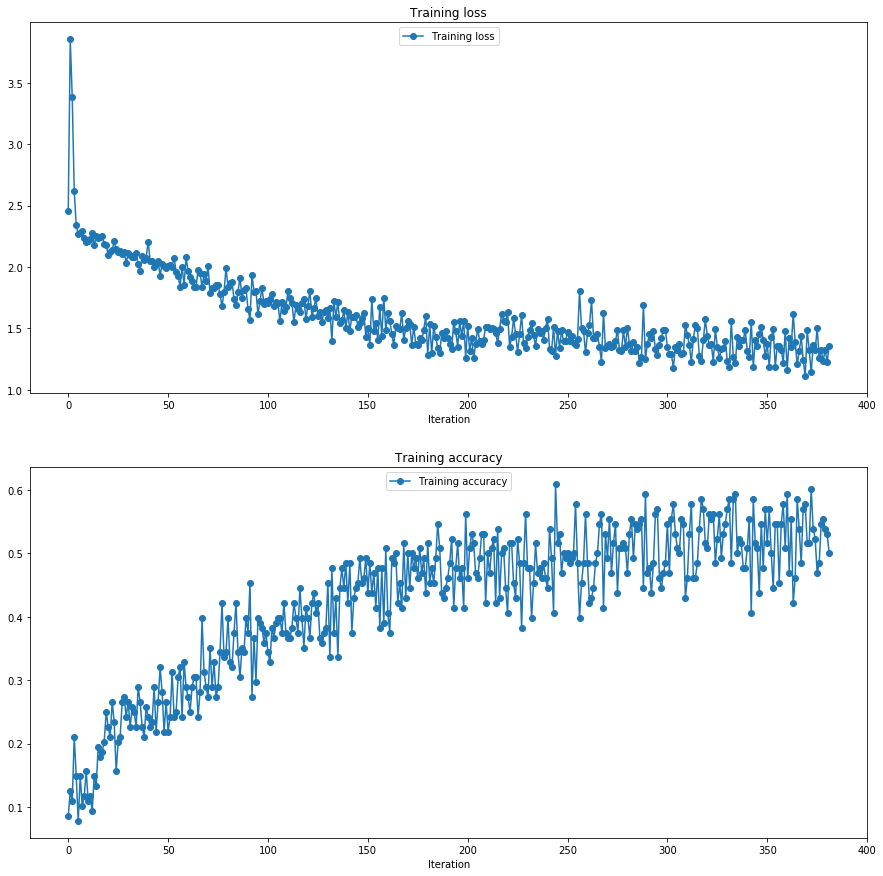

validation for epoch 0
-  epoch 0: validation accuracy = 0.561
train for epoch 1
iteration (400): loss = 1.305, accuracy = 0.555
iteration (450): loss = 1.295, accuracy = 0.562
iteration (500): loss = 1.239, accuracy = 0.539
iteration (550): loss = 0.949, accuracy = 0.680
iteration (600): loss = 1.179, accuracy = 0.578
iteration (650): loss = 1.305, accuracy = 0.523
iteration (700): loss = 1.166, accuracy = 0.609
iteration (750): loss = 1.012, accuracy = 0.633


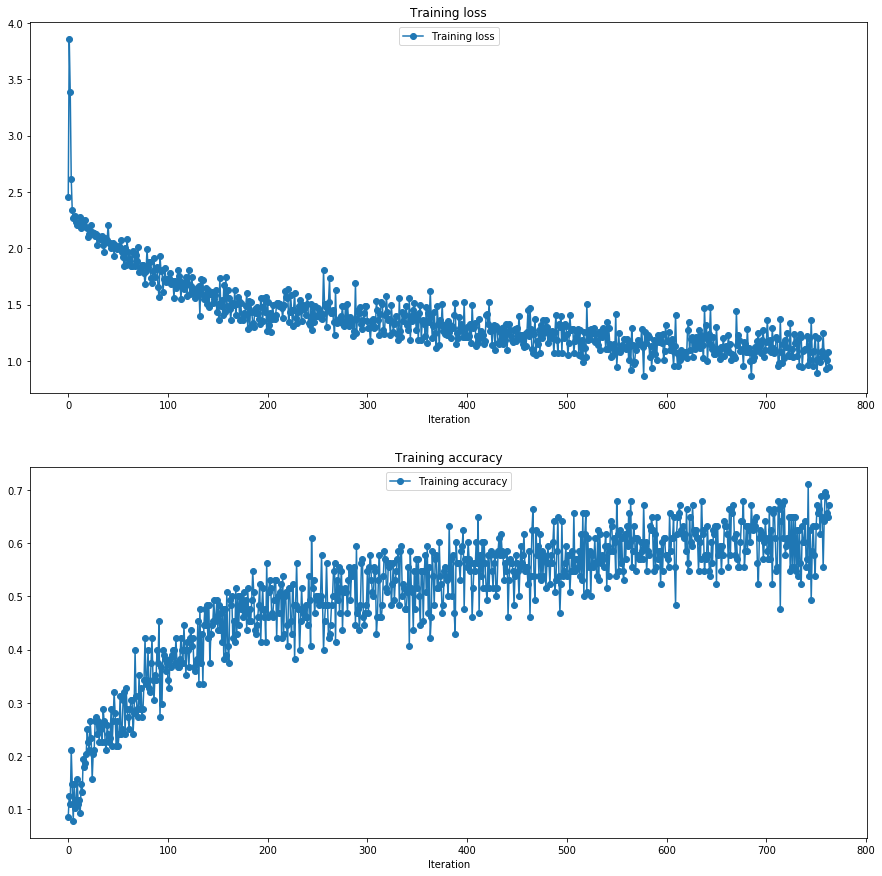

validation for epoch 1
-  epoch 1: validation accuracy = 0.629
train for epoch 2
iteration (800): loss = 0.917, accuracy = 0.664
iteration (850): loss = 1.066, accuracy = 0.625
iteration (900): loss = 0.913, accuracy = 0.711
iteration (950): loss = 0.802, accuracy = 0.742
iteration (1000): loss = 0.875, accuracy = 0.742
iteration (1050): loss = 0.907, accuracy = 0.641
iteration (1100): loss = 0.953, accuracy = 0.711


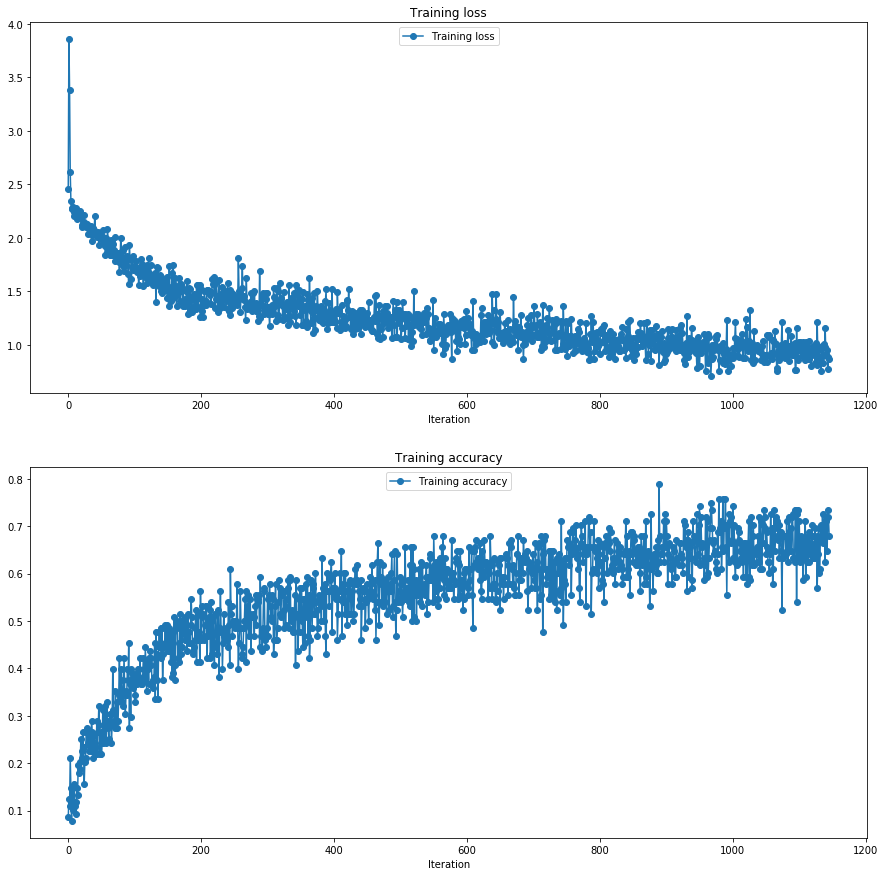

validation for epoch 2
-  epoch 2: validation accuracy = 0.642
train for epoch 3
iteration (1150): loss = 0.851, accuracy = 0.695
iteration (1200): loss = 0.792, accuracy = 0.695
iteration (1250): loss = 0.868, accuracy = 0.695
iteration (1300): loss = 0.992, accuracy = 0.648
iteration (1350): loss = 0.639, accuracy = 0.805
iteration (1400): loss = 0.829, accuracy = 0.664
iteration (1450): loss = 0.827, accuracy = 0.711
iteration (1500): loss = 0.567, accuracy = 0.812


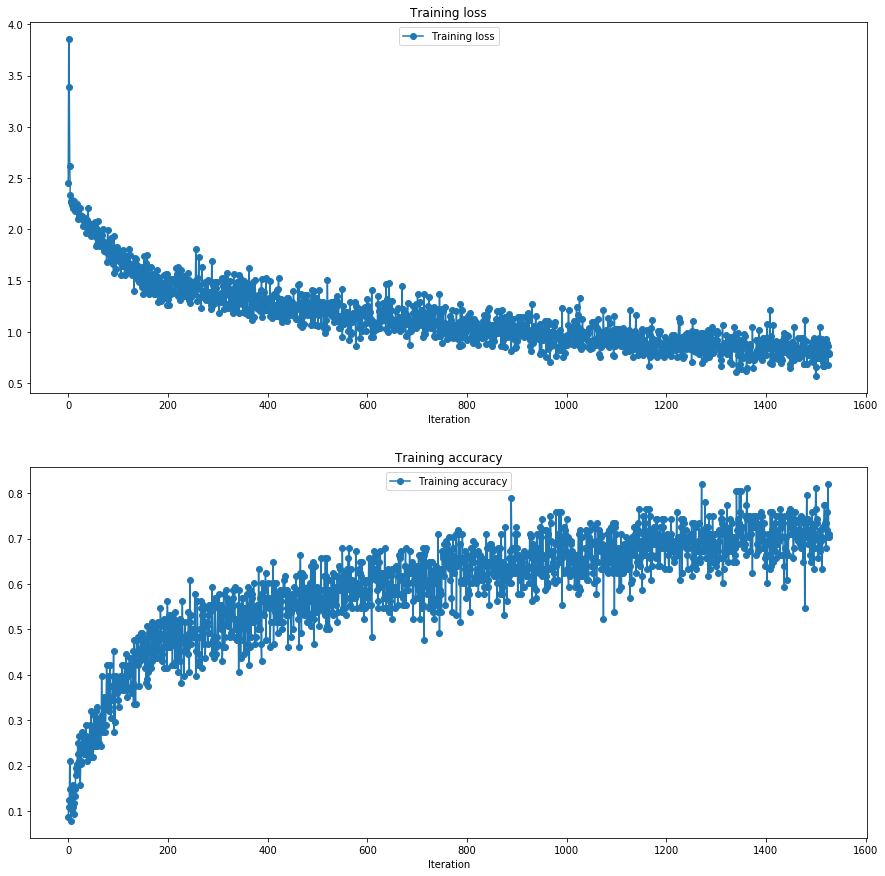

validation for epoch 3
-  epoch 3: validation accuracy = 0.644
train for epoch 4
iteration (1550): loss = 0.673, accuracy = 0.758
iteration (1600): loss = 0.770, accuracy = 0.727
iteration (1650): loss = 0.766, accuracy = 0.727
iteration (1700): loss = 0.681, accuracy = 0.727
iteration (1750): loss = 0.779, accuracy = 0.742
iteration (1800): loss = 0.759, accuracy = 0.719
iteration (1850): loss = 0.687, accuracy = 0.742
iteration (1900): loss = 0.689, accuracy = 0.773


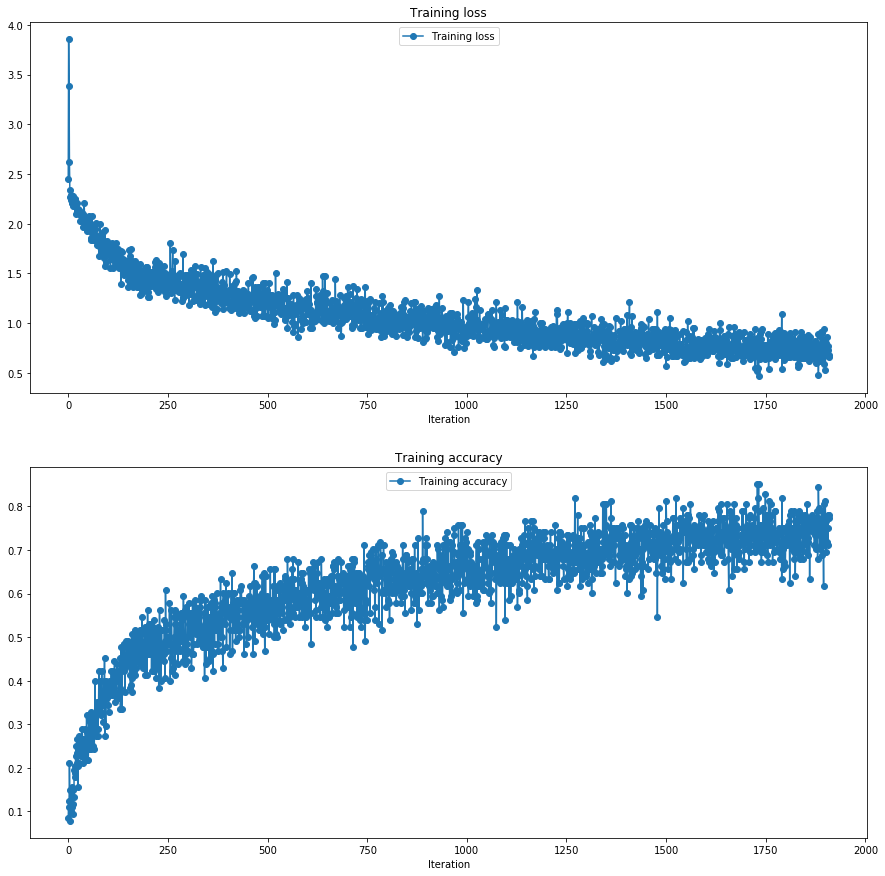

validation for epoch 4
-  epoch 4: validation accuracy = 0.646
***** test accuracy: 0.635
Model saved in lib/tf_models/problem2/csci-599_sample.ckpt


In [12]:
# Clear old computation graphs
tf.reset_default_graph()


# Train our sample model
with tf.Session() as sess:
    with tf.device('/cpu:0'):
        model = BaseModel()
        model.train(sess, X_train, Y_train, X_val, Y_val)
        accuracy = model.evaluate(sess, X_test, Y_test)
        print('***** test accuracy: %.3f' % accuracy)
        saver = tf.train.Saver()
        model_path = saver.save(sess, "lib/tf_models/problem2/csci-599_sample.ckpt")
        print("Model saved in %s" % model_path)

## Question 2-2

Implement your own model. 

You can modify the template code as you want and you can use GPU for fast training.

These are the techniques that you can try:
- Data preprocessing
- Data augmentation
- Dropout
- Batch normalization
- More convolutional layers
- More training epochs
- Learning rate decay
- Any other models and techniqes

Your model should achieve >= 70% accuracy on the test set of CIFAR-10.

If the accuracy of the model reaches to 80% on the test set, you will get 5 extra points.

In [9]:
class YourModel(BaseModel):
    def __init__(self):
        super(YourModel, self).__init__()
        self.num_epoch = 10
         

    def _model(self):
        print('-' * 5 + '  Your model  ' + '-' * 5)

        #############################################################################
        # TODO: Implement you own model here                                        #
        #############################################################################
        print('input layer: ' + str(self.X.get_shape()))

        with tf.variable_scope('conv1_1'):
            self.conv1_1 = conv2d_contrib(self.X, 3, 1, 64)
            self.bn1_1 = batch_norm(self.conv1_1, self.is_training)
            self.relu1_1 = tf.nn.relu(self.bn1_1)
            self.pool1 = max_pool(self.relu1_1, 2, 2)            
            print('conv1 layer: ' + str(self.pool1.get_shape()))

        with tf.variable_scope('conv2_1'):
            self.conv2_1 = conv2d_contrib(self.pool1, 3, 1, 64)
            self.bn2_1 = batch_norm(self.conv2_1, self.is_training)
            self.relu2_1 = tf.nn.relu(self.bn2_1)
            self.pool2 = max_pool(self.relu2_1, 2, 2)          
            print('conv2 layer: ' + str(self.pool2.get_shape()))

        with tf.variable_scope('conv3_1'):
            self.conv3_1 = conv2d_contrib(self.pool2, 3, 1, 128)
            self.bn3_1 = batch_norm(self.conv3_1, self.is_training)
            self.relu3_1 = tf.nn.relu(self.bn3_1)
            self.pool3 = max_pool(self.relu3_1, 2, 2)          
            print('conv3 layer: ' + str(self.pool3.get_shape()))
        
        with tf.variable_scope('conv4_1'):
            self.conv4_1 = conv2d_contrib(self.pool3, 3, 1, 256)
            self.bn4_1 = batch_norm(self.conv4_1, self.is_training)
            self.relu4_1 = tf.nn.relu(self.bn4_1)  
            self.pool4 = max_pool(self.relu4_1, 2, 2) 
            print('conv4 layer: ' + str(self.pool4.get_shape()))
            
        with tf.variable_scope('conv5_1'):
            self.conv5_1 = conv2d_contrib(self.pool4, 3, 1, 512)
            self.bn5_1 = batch_norm(self.conv5_1, self.is_training)
            self.relu5_1 = tf.nn.relu(self.bn5_1)
            self.pool5 = max_pool(self.relu5_1, 2, 2) 
            print('conv5 layer: ' + str(self.pool5.get_shape()))
        
        self.flat6 = flat(self.pool5)
        with tf.variable_scope('fc6'):
            self.fc6 = fc(self.flat6, 4096)
            self.relu6 = tf.nn.relu(self.fc6)
            if self.is_training:
                self.relu6 = tf.nn.dropout(self.relu6, self.keep_prob)
            print('fc6 layer: ' + str(self.relu6.get_shape()))

        with tf.variable_scope('fc7'):
            self.fc7 = fc(self.relu6, 4096)
            self.relu7 = tf.nn.relu(self.fc7)
            if self.is_training:
                self.relu7 = tf.nn.dropout(self.relu7, self.keep_prob)
            print('fc7 layer: ' + str(self.relu7.get_shape()))


        with tf.variable_scope('fc8'):
            self.fc8 = fc(self.relu7, 10)
            print('fc8 layer: ' + str(self.fc8.get_shape()))

        # Return the last layer
        return self.fc8
        #############################################################################
        #                             END OF YOUR CODE                              #
        #############################################################################

    #############################################################################
    # TODO: You can redefine BaseModel's methods                                #
    #############################################################################
    def _input_ops(self):
        # Placeholders
        self.X = tf.placeholder(tf.float32, [None, 32, 32, 3])
        self.Y = tf.placeholder(tf.int64, [None])
        self.keep_prob = 0.6
        self.is_training = True


    def _build_optimizer(self):
        global_step = tf.Variable(0, name='global_step', trainable=False)
        learning_rate = tf.train.exponential_decay(learning_rate=float(1e-3),
                                            global_step=global_step,
                                            decay_steps=5000,
                                            decay_rate=0.95,
                                            staircase=False)
            
        optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
        self.train_op = optimiser.minimize(loss=self.loss_op, global_step=global_step)
        
    def _loss(self, labels, logits):
        from tensorflow.python.ops import control_flow_ops
        reduced_loss =  tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))   
        
        update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
        if update_ops:
            updates = tf.group(*update_ops)
            reduced_loss = control_flow_ops.with_dependencies([updates], reduced_loss)
        
        self.loss_op = reduced_loss
        
    def _preprocessing(self):
        output_list = []
        for i in range(self.batch_size):
            if(i%10==0):
                distorted_image = tf.image.random_flip_left_right(self.X[i, :])
                distorted_image = tf.image.random_brightness(distorted_image, max_delta=63)
                distorted_image = tf.image.random_contrast(distorted_image, lower=0.2, upper=1.8)
                distorted_image = tf.image.per_image_standardization(distorted_image)
                output_list.append(distorted_image)
            else:
                output_list.append(self.X[i,:])
        self.X = tf.stack(output_list)
        print('Finish preprocessing training set')
               
        
    def _build_model(self):
        # Define input variables
        self._input_ops()
        
        #Preprocessing images
        if self.is_training is True:
            self._preprocessing()

        # Convert Y to one-hot vector
        labels = tf.one_hot(self.Y, 10)

        # Build a model and get logits
        logits = self._model()

        # Compute loss
        self._loss(labels, logits)
        
        # Build optimizer
        self._build_optimizer()

        # Compute accuracy
        predict = tf.argmax(logits, 1)
        correct = tf.equal(predict, self.Y)
        self.accuracy_op = tf.reduce_mean(tf.cast(correct, tf.float32))
    
    
    
    def train(self, sess, X_train, Y_train, X_val, Y_val):
        
        sess.run(tf.global_variables_initializer())
        step = 0
        losses = []
        accuracies = []
        self.is_training = True
        
        print('-' * 5 + '  Start training  ' + '-' * 5)
        
        for epoch in range(self.num_epoch):
            print('train for epoch %d' % epoch)
            for i in range(num_training // self.batch_size):
                
                X_ = X_train[i * self.batch_size:(i + 1) * self.batch_size][:]
                Y_ = Y_train[i * self.batch_size:(i + 1) * self.batch_size]

                feed_dict = {self.X: X_,
                             self.Y: Y_}

                fetches = [self.train_op, self.loss_op, self.accuracy_op]

                _, loss, accuracy = sess.run(fetches, feed_dict=feed_dict)
                losses.append(loss)
                accuracies.append(accuracy)

                if step % self.log_step == 0:
                    print('iteration (%d): loss = %.3f, accuracy = %.3f' %
                        (step, loss, accuracy))
                step += 1

            # Graph 1. X: epoch, Y: training loss
            plt.subplot(2, 1, 1)
            plt.title('Training loss')
            plt.plot(losses, '-o', label="Training loss")
            plt.xlabel('Iteration')

            # Graph 2. X: epoch, Y: training accuracy
            plt.subplot(2, 1, 2)
            plt.title('Training accuracy')
            plt.plot(accuracies, '-o', label="Training accuracy")
            plt.xlabel('Iteration')
            
            for i in [1, 2]:
                plt.subplot(2, 1, i)
                plt.legend(loc='upper center', ncol=4)
            plt.gcf().set_size_inches(15, 15)
            plt.show()

            # Print validation results
            print('validation for epoch %d' % epoch)
            val_accuracy = self.evaluate(sess, X_val, Y_val)
            print('-  epoch %d: validation accuracy = %.3f' % (epoch, val_accuracy))

    def evaluate(self, sess, X_eval, Y_eval):
        
        eval_accuracy = 0.0
        eval_iter = 0
        self.is_training = False
        
        for i in range(X_eval.shape[0] // self.batch_size):
            X_ = X_eval[i * self.batch_size:(i + 1) * self.batch_size][:]
            Y_ = Y_eval[i * self.batch_size:(i + 1) * self.batch_size]
                        
            feed_dict = {self.X: X_,
                         self.Y: Y_}
            
            accuracy = sess.run(self.accuracy_op, feed_dict=feed_dict)
            eval_accuracy += accuracy
            eval_iter += 1
        return eval_accuracy / eval_iter
        

    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################

Finish preprocessing training set
-----  Your model  -----
input layer: (128, 32, 32, 3)
conv1 layer: (128, 16, 16, 64)
conv2 layer: (128, 8, 8, 64)
conv3 layer: (128, 4, 4, 128)
conv4 layer: (128, 2, 2, 256)
conv5 layer: (128, 1, 1, 512)
fc6 layer: (128, 4096)
fc7 layer: (128, 4096)
fc8 layer: (128, 10)
-----  Start training  -----
train for epoch 0
iteration (0): loss = 2.302, accuracy = 0.133
iteration (50): loss = 1.713, accuracy = 0.344
iteration (100): loss = 1.558, accuracy = 0.398
iteration (150): loss = 1.380, accuracy = 0.445
iteration (200): loss = 1.313, accuracy = 0.492
iteration (250): loss = 1.326, accuracy = 0.516
iteration (300): loss = 1.213, accuracy = 0.555
iteration (350): loss = 1.256, accuracy = 0.539


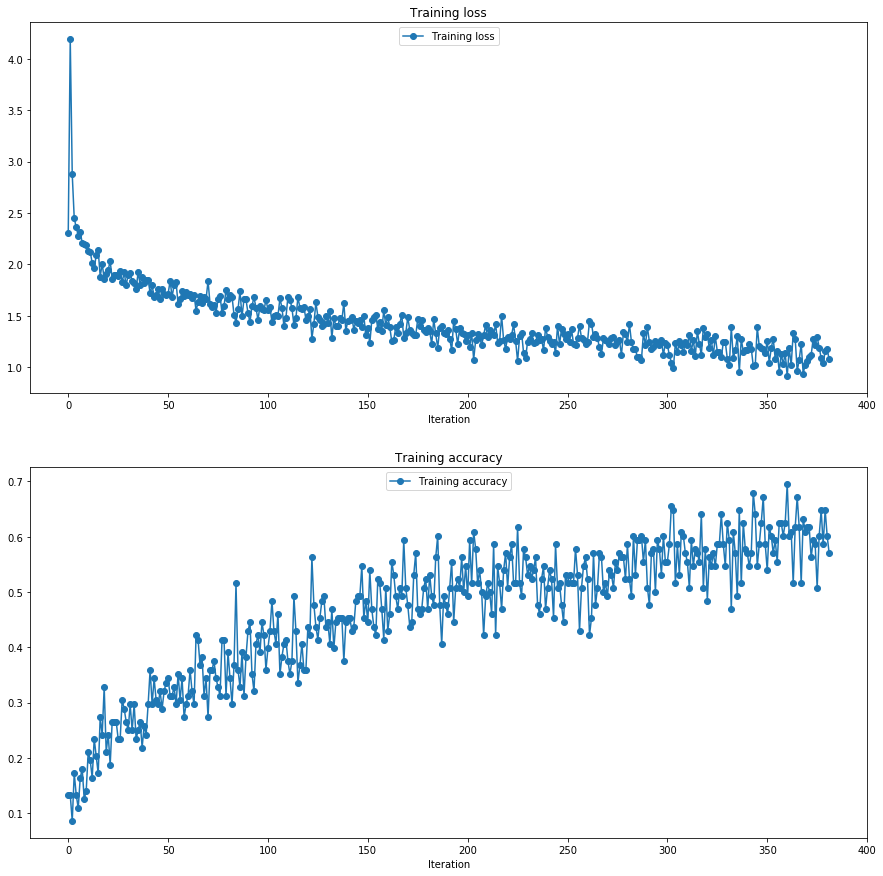

validation for epoch 0
-  epoch 0: validation accuracy = 0.609
train for epoch 1
iteration (400): loss = 1.084, accuracy = 0.578
iteration (450): loss = 1.116, accuracy = 0.578
iteration (500): loss = 1.027, accuracy = 0.602
iteration (550): loss = 0.926, accuracy = 0.648
iteration (600): loss = 0.776, accuracy = 0.719
iteration (650): loss = 1.120, accuracy = 0.609
iteration (700): loss = 1.128, accuracy = 0.578
iteration (750): loss = 0.743, accuracy = 0.734


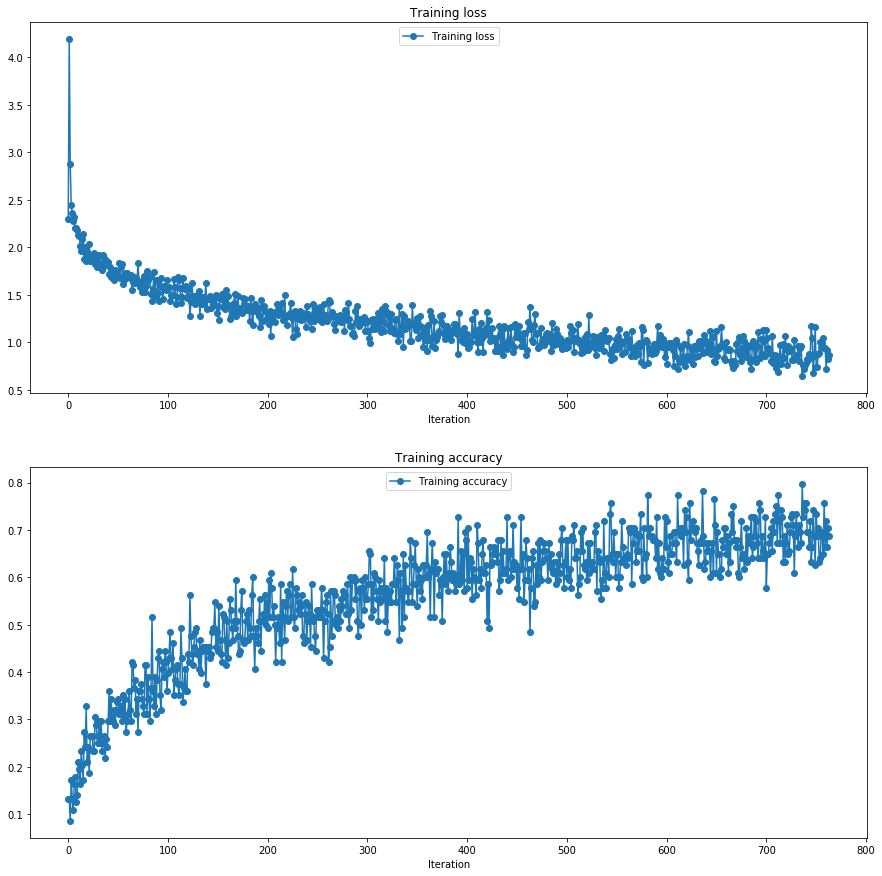

validation for epoch 1
-  epoch 1: validation accuracy = 0.677
train for epoch 2
iteration (800): loss = 0.646, accuracy = 0.773
iteration (850): loss = 1.076, accuracy = 0.672
iteration (900): loss = 0.861, accuracy = 0.711
iteration (950): loss = 0.713, accuracy = 0.742
iteration (1000): loss = 0.620, accuracy = 0.805
iteration (1050): loss = 0.693, accuracy = 0.766
iteration (1100): loss = 0.685, accuracy = 0.758


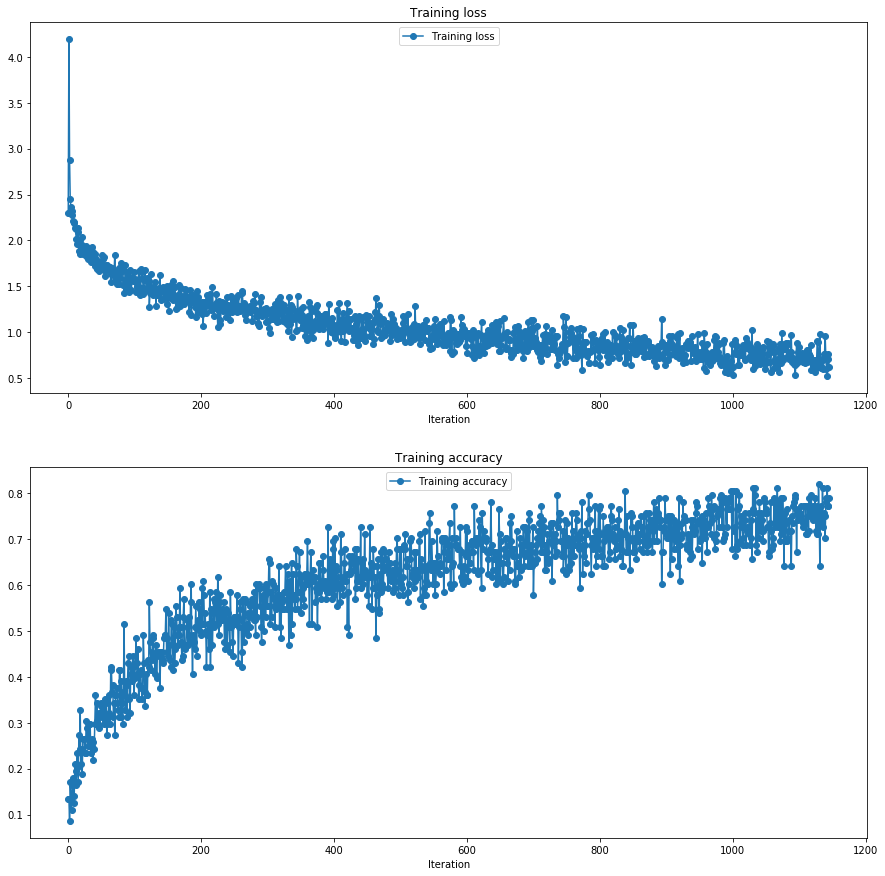

validation for epoch 2
-  epoch 2: validation accuracy = 0.715
train for epoch 3
iteration (1150): loss = 0.671, accuracy = 0.773
iteration (1200): loss = 0.650, accuracy = 0.781
iteration (1250): loss = 0.722, accuracy = 0.750
iteration (1300): loss = 0.694, accuracy = 0.766
iteration (1350): loss = 0.589, accuracy = 0.812
iteration (1400): loss = 0.548, accuracy = 0.812
iteration (1450): loss = 0.580, accuracy = 0.789
iteration (1500): loss = 0.425, accuracy = 0.844


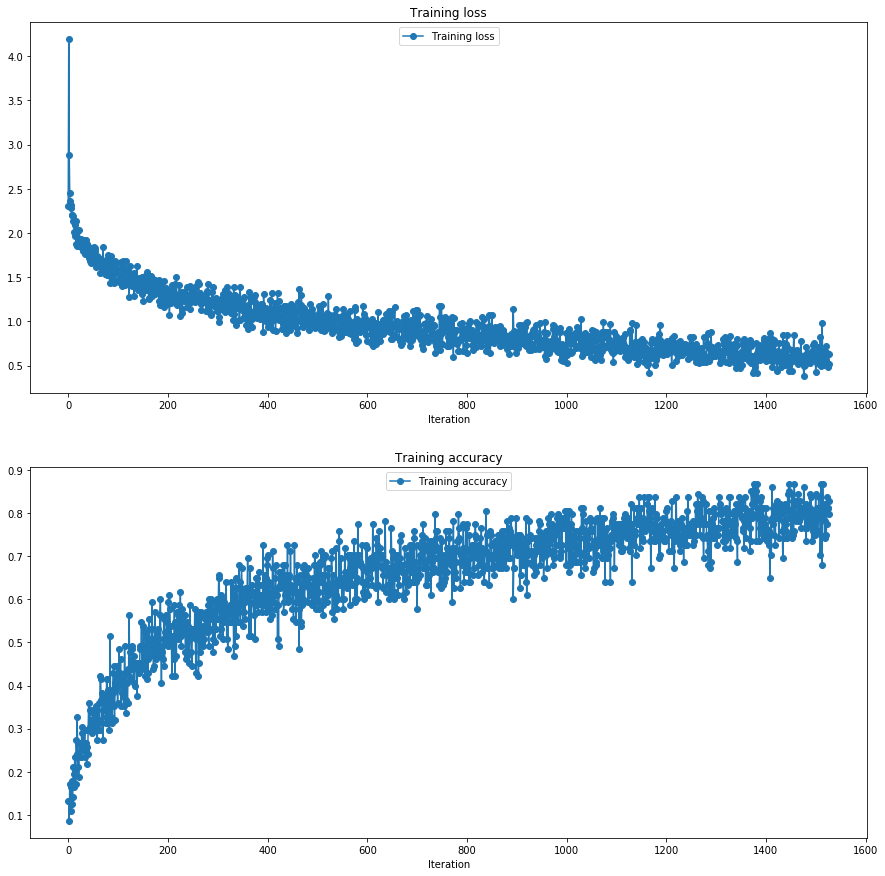

validation for epoch 3
-  epoch 3: validation accuracy = 0.739
train for epoch 4
iteration (1550): loss = 0.521, accuracy = 0.789
iteration (1600): loss = 0.635, accuracy = 0.766
iteration (1650): loss = 0.639, accuracy = 0.797
iteration (1700): loss = 0.605, accuracy = 0.773
iteration (1750): loss = 0.773, accuracy = 0.742
iteration (1800): loss = 0.543, accuracy = 0.781
iteration (1850): loss = 0.433, accuracy = 0.859
iteration (1900): loss = 0.450, accuracy = 0.828


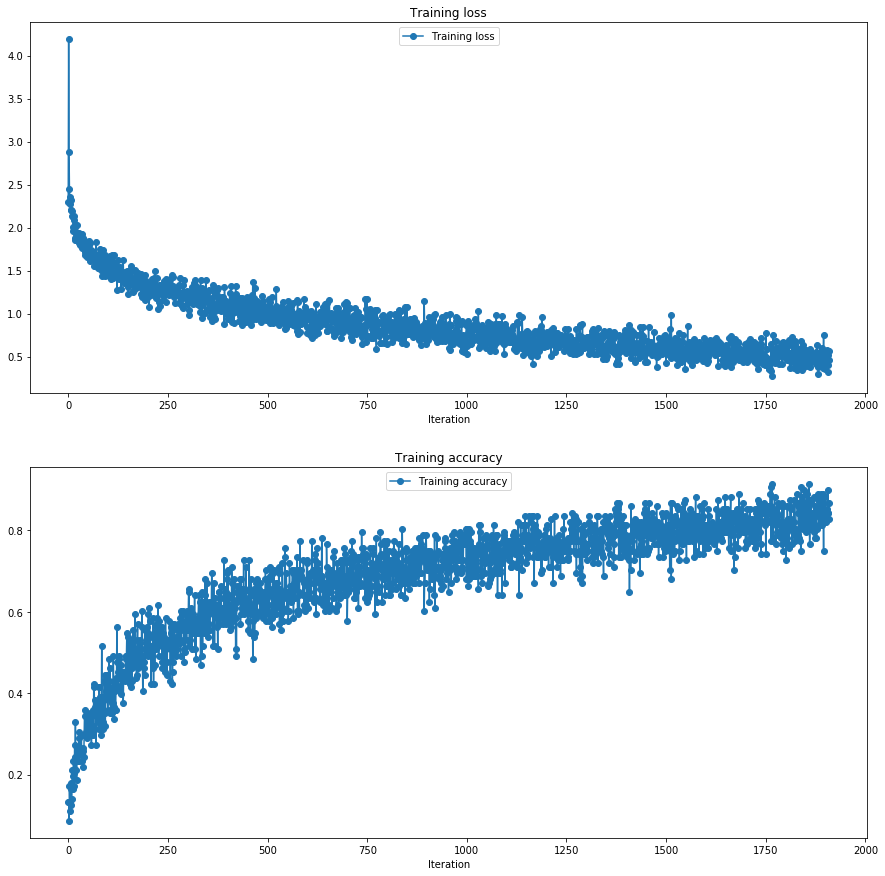

validation for epoch 4
-  epoch 4: validation accuracy = 0.744
train for epoch 5
iteration (1950): loss = 0.506, accuracy = 0.789
iteration (2000): loss = 0.375, accuracy = 0.859
iteration (2050): loss = 0.495, accuracy = 0.844
iteration (2100): loss = 0.659, accuracy = 0.781
iteration (2150): loss = 0.516, accuracy = 0.820
iteration (2200): loss = 0.547, accuracy = 0.812
iteration (2250): loss = 0.350, accuracy = 0.906


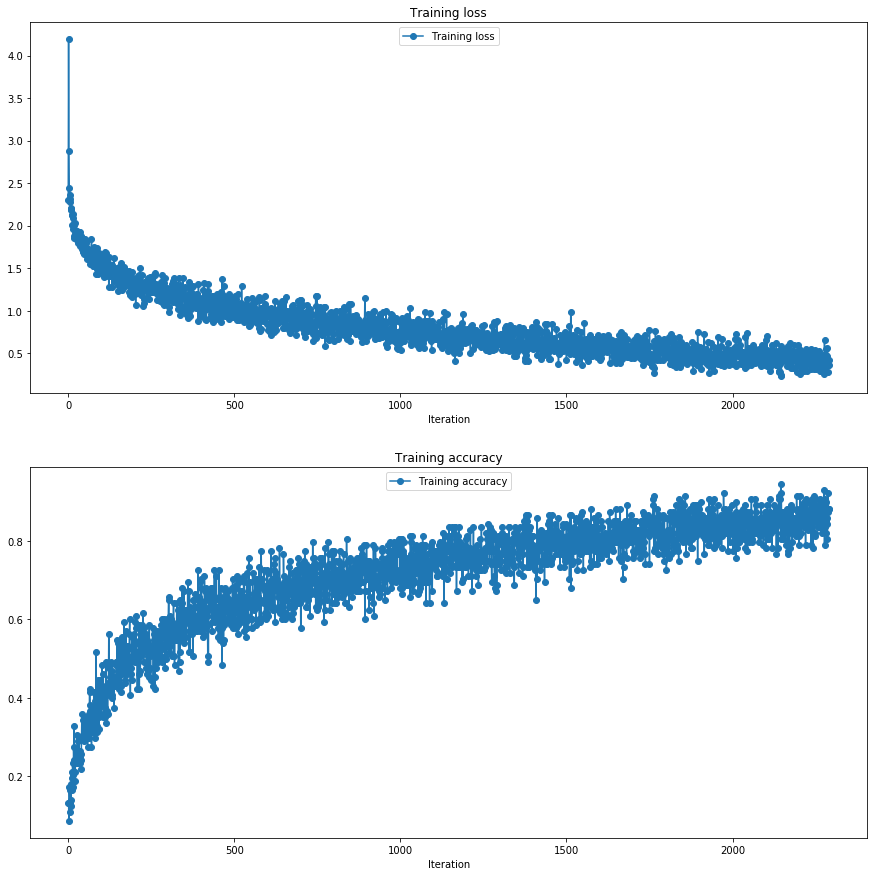

validation for epoch 5
-  epoch 5: validation accuracy = 0.755
train for epoch 6
iteration (2300): loss = 0.382, accuracy = 0.859
iteration (2350): loss = 0.446, accuracy = 0.859
iteration (2400): loss = 0.610, accuracy = 0.812
iteration (2450): loss = 0.504, accuracy = 0.789
iteration (2500): loss = 0.372, accuracy = 0.859
iteration (2550): loss = 0.410, accuracy = 0.859
iteration (2600): loss = 0.309, accuracy = 0.906
iteration (2650): loss = 0.337, accuracy = 0.859


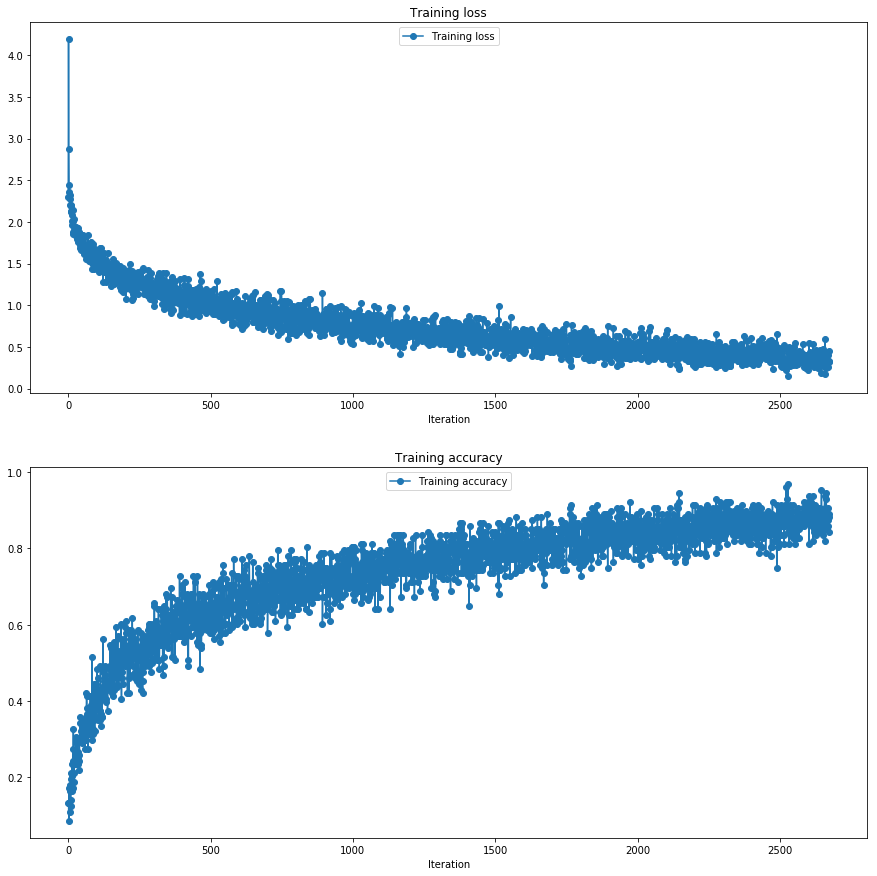

validation for epoch 6
-  epoch 6: validation accuracy = 0.773
train for epoch 7
iteration (2700): loss = 0.365, accuracy = 0.883
iteration (2750): loss = 0.411, accuracy = 0.875
iteration (2800): loss = 0.360, accuracy = 0.867
iteration (2850): loss = 0.231, accuracy = 0.938
iteration (2900): loss = 0.204, accuracy = 0.922
iteration (2950): loss = 0.322, accuracy = 0.914
iteration (3000): loss = 0.339, accuracy = 0.867
iteration (3050): loss = 0.279, accuracy = 0.891


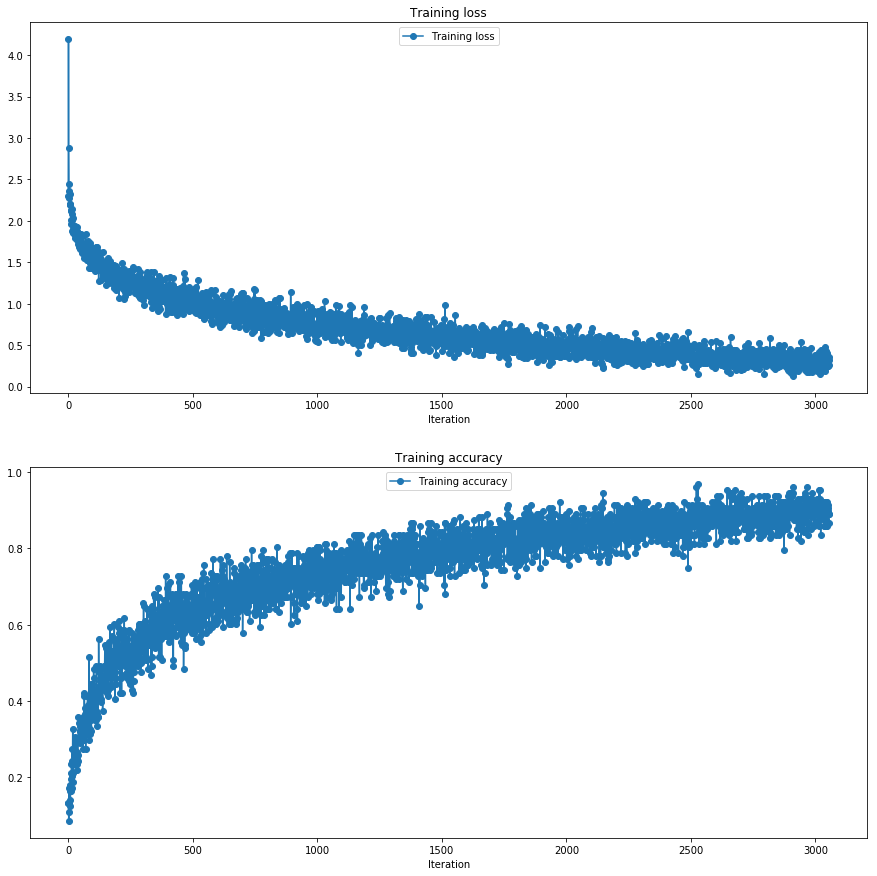

validation for epoch 7
-  epoch 7: validation accuracy = 0.761
train for epoch 8
iteration (3100): loss = 0.288, accuracy = 0.898
iteration (3150): loss = 0.253, accuracy = 0.914
iteration (3200): loss = 0.362, accuracy = 0.852
iteration (3250): loss = 0.339, accuracy = 0.875
iteration (3300): loss = 0.146, accuracy = 0.930
iteration (3350): loss = 0.292, accuracy = 0.891
iteration (3400): loss = 0.269, accuracy = 0.906


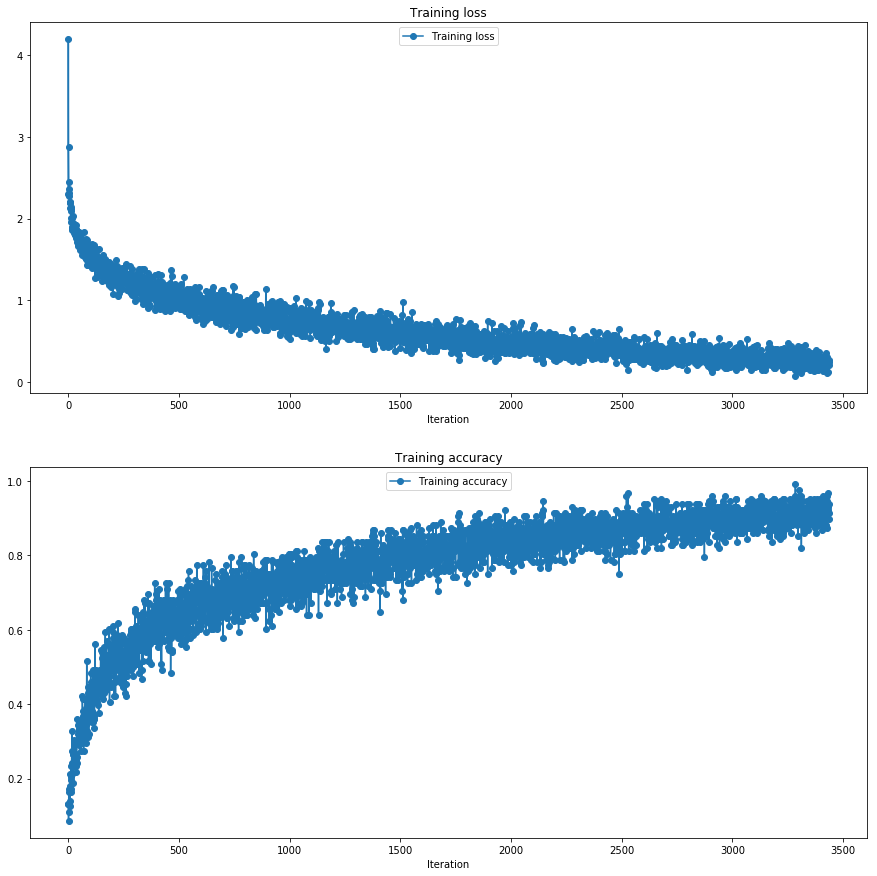

validation for epoch 8
-  epoch 8: validation accuracy = 0.773
train for epoch 9
iteration (3450): loss = 0.273, accuracy = 0.906
iteration (3500): loss = 0.232, accuracy = 0.922
iteration (3550): loss = 0.322, accuracy = 0.898
iteration (3600): loss = 0.352, accuracy = 0.906
iteration (3650): loss = 0.263, accuracy = 0.906
iteration (3700): loss = 0.311, accuracy = 0.875
iteration (3750): loss = 0.222, accuracy = 0.930
iteration (3800): loss = 0.205, accuracy = 0.953


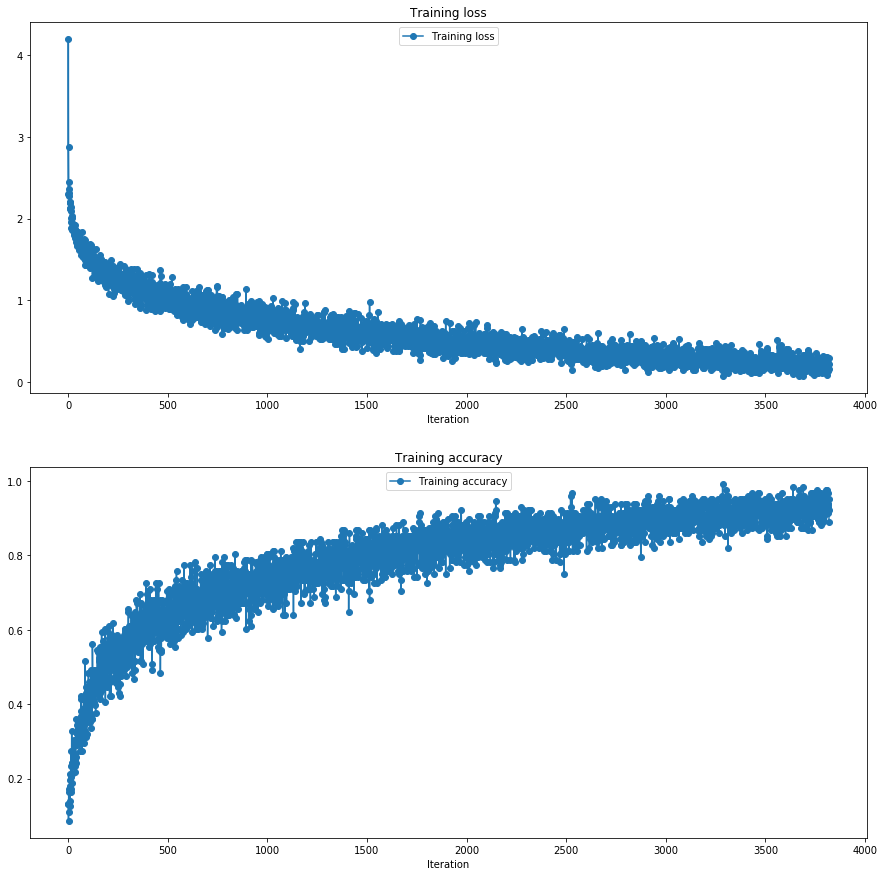

validation for epoch 9
-  epoch 9: validation accuracy = 0.770
***** test accuracy: 0.774
Model saved in lib/tf_models/problem2/csci-599_mine.ckpt


In [10]:
# Clear old computation graphs
tf.reset_default_graph()
sess = tf.Session()

#############################################################################
# TODO: Preprocessing                                                       #
#############################################################################
X_train_ = X_train
X_val_ = X_val
X_test_ = X_test
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################

model = YourModel()
model.train(sess, X_train_, Y_train, X_test_, Y_test)
accuracy = model.evaluate(sess, X_test_, Y_test)
print('***** test accuracy: %.3f' % accuracy)

# Save your model
saver = tf.train.Saver()
model_path = saver.save(sess, "lib/tf_models/problem2/csci-599_mine.ckpt")
print("Model saved in %s" % model_path)

sess.close()

In [11]:
tf.reset_default_graph()

# Load your model
model = YourModel()
sess = tf.Session()
saver = tf.train.Saver()
saver.restore(sess, "lib/tf_models/problem2/csci-599_mine.ckpt")

Finish preprocessing training set
-----  Your model  -----
input layer: (128, 32, 32, 3)
conv1 layer: (128, 16, 16, 64)
conv2 layer: (128, 8, 8, 64)
conv3 layer: (128, 4, 4, 128)
conv4 layer: (128, 2, 2, 256)
conv5 layer: (128, 1, 1, 512)
fc6 layer: (128, 4096)
fc7 layer: (128, 4096)
fc8 layer: (128, 10)
INFO:tensorflow:Restoring parameters from lib/tf_models/problem2/csci-599_mine.ckpt


INFO:tensorflow:Restoring parameters from lib/tf_models/problem2/csci-599_mine.ckpt
